In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import matplotlib
import seaborn as sns
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [6]:
import sklearn

In [7]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [8]:
train = pd.read_csv("house_train.csv")

In [9]:
test = pd.read_csv("house_test.csv")

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
#取得列名を番号で指定したいときにはiloc, ラベルで指定したいときはloc
all_data = pd.concat((train.iloc[:, 1:-1], test.iloc[:, 1:-1]))

In [12]:
all_data.shape

(2919, 79)

In [13]:
# check na value count
nullCnt = pd.DataFrame({'nullNums' : all_data.isnull().sum()})
nullCnt['DataType'] = all_data[nullCnt.index].dtypes

In [14]:
nullCnt[nullCnt['nullNums'] > 0].sort('DataType')

,nullNums,DataType
GarageArea,1,float64
TotalBsmtSF,1,float64
BsmtFinSF1,1,float64
BsmtFinSF2,1,float64
GarageYrBlt,159,float64
BsmtFullBath,2,float64
BsmtHalfBath,2,float64
GarageCars,1,float64
BsmtUnfSF,1,float64
MasVnrArea,23,float64


In [15]:
# Convert all object to categorical data
objColumns = all_data.dtypes[all_data.dtypes == 'object'].index
# There are several columns of categorical data represented as numeric. Convert them to categorical ones
# "|" :"または　"という意味
for name in objColumns | pd.Index(['MSSubClass']):
    all_data[name] = all_data[name].astype("category")

In [16]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,...,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,...,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,...,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,...,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,...,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null category
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null category
BsmtCond         2837 non-null category
BsmtExposure     2837 non-null category
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null category
BsmtFinType2     2839 non-null category
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null category
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null category
Condition1       2919 non-null category
Condition2       2919 non-null category
Electrical       2918 non-null category
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null category
ExterQual        2919 non-null cat

In [18]:
target = np.log1p(train['SalePrice'])

In [19]:
numColumns = all_data.dtypes[all_data.dtypes != 'category'].index

In [20]:
numColumns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [21]:
skewed_feats = all_data[numColumns].apply(lambda x: skew(x.dropna()))

In [22]:
skewed_feats = skewed_feats[skewed_feats > 0.75].index

In [23]:
all_data[skewed_feats].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,GrLivArea,KitchenAbvGr,...,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF
0,856,854,0,706,0,0,150,0,1710,1,...,65,0,196,0,61,0,0,8,856,0
1,1262,0,0,978,0,1,284,0,1262,1,...,80,0,0,0,0,0,0,6,1262,298
2,920,866,0,486,0,0,434,0,1786,1,...,68,0,162,0,42,0,0,6,920,0
3,961,756,0,216,0,0,540,272,1717,1,...,60,0,0,0,35,0,0,7,756,0
4,1145,1053,0,655,0,0,490,0,2198,1,...,84,0,350,0,84,0,0,9,1145,192


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fbd5978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11383a518>]], dtype=object)

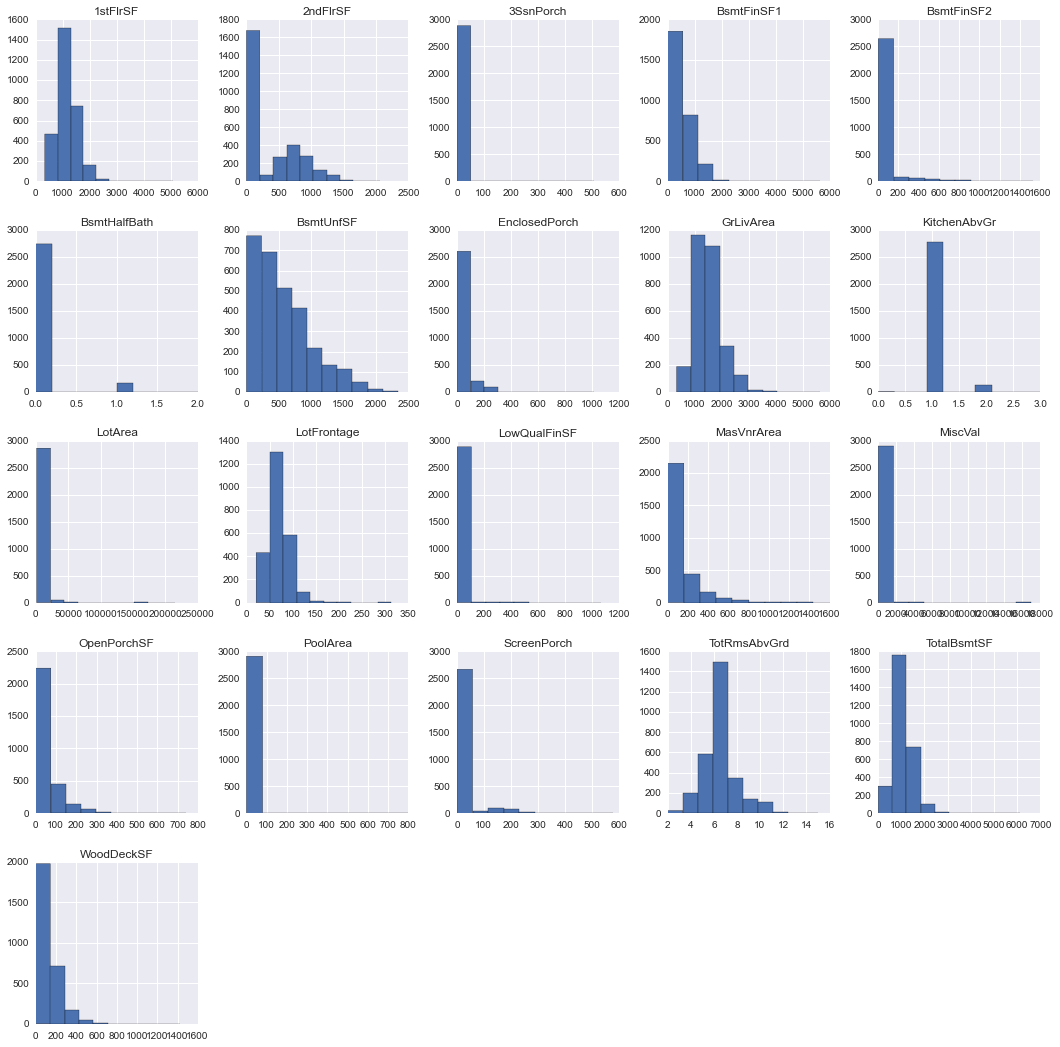

In [24]:
matplotlib.rcParams['figure.figsize'] = (18.0, 18.0)
all_data[skewed_feats].hist()

In [25]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fbd2978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115c01be0>]], dtype=object)

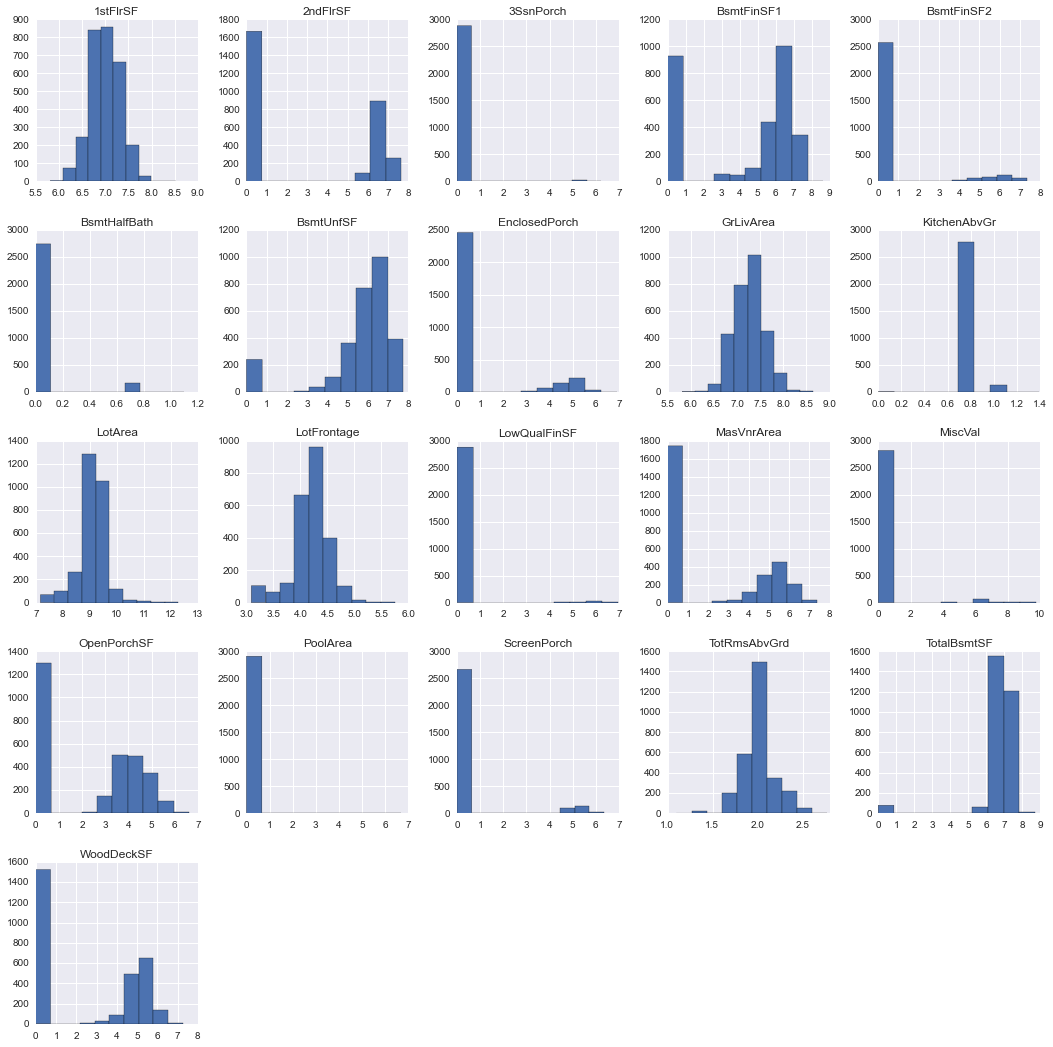

In [26]:
matplotlib.rcParams['figure.figsize'] = (18.0, 18.0)
all_data[skewed_feats].hist()

In [27]:
# GarageYrBlt
garageFeats = pd.Index([name for name in all_data.columns if u'Garage' in name])

In [28]:
garageFeats

Index(['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'GarageYrBlt'],
      dtype='object')

In [29]:
all_data.loc[all_data['GarageYrBlt'].isnull(), garageFeats].head(10)

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
39,0,0,NaN,NaN,NaN,NaN,NaN
48,0,0,NaN,NaN,NaN,NaN,NaN
78,0,0,NaN,NaN,NaN,NaN,NaN
88,0,0,NaN,NaN,NaN,NaN,NaN
89,0,0,NaN,NaN,NaN,NaN,NaN
99,0,0,NaN,NaN,NaN,NaN,NaN
108,0,0,NaN,NaN,NaN,NaN,NaN
125,0,0,NaN,NaN,NaN,NaN,NaN
127,0,0,NaN,NaN,NaN,NaN,NaN
140,0,0,NaN,NaN,NaN,NaN,NaN


In [30]:
for name in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data.loc[all_data['GarageType'].isnull(),[name]] = 0

In [31]:

# Now let's handle LotFrontage
lotFeats = [name for name in all_data.columns if u'Lot' in name]
all_data.loc[all_data['LotFrontage'].isnull(), lotFeats].head()


,LotArea,LotConfig,LotFrontage,LotShape
7,9.247925,Corner,NaN,IR1
12,9.470317,Inside,NaN,IR2
14,9.298443,Corner,NaN,IR1
16,9.327412,CulDSac,NaN,IR1
24,9.017605,Inside,NaN,IR1


In [32]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

/Users/yoichi.yamakawa/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


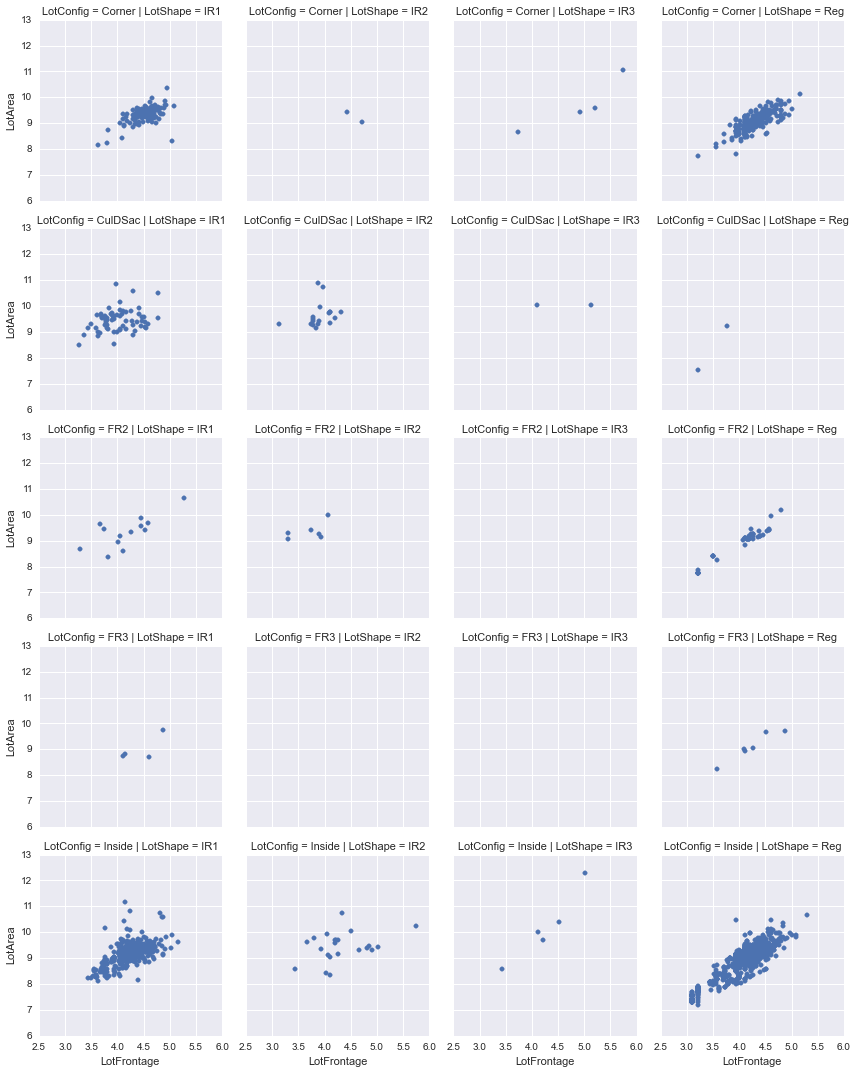

In [36]:
facet = sns.FacetGrid(all_data.loc[all_data['LotFrontage'].notnull(), lotFeats], row = 'LotConfig', col='LotShape')
facet.map(plot.scatter, "LotFrontage", "LotArea")

In [37]:
pd.pivot_table(all_data.loc[all_data['LotFrontage'].isnull(), lotFeats], values = ['LotArea'], index = ['LotShape'], columns = ['LotConfig'], 
               aggfunc = np.count_nonzero)

LotArea                       
LotConfig  Corner CulDSac FR2 FR3 Inside
LotShape                                
IR1            73      76  12   3    157
IR2            11       9   3 NaN      5
IR3             2       1 NaN NaN      2
Reg            18       1   5   1    107

In [38]:
from sklearn.linear_model import LinearRegression

In [44]:
reg = LinearRegression()

In [45]:
reg.fit(all_data.loc[all_data['LotFrontage'].notnull(), ['LotArea']], all_data.loc[all_data['LotFrontage'].notnull(), ['LotFrontage']])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
all_data.loc[all_data['LotFrontage'].isnull(), ['LotFrontage']] = reg.predict(all_data.loc[all_data['LotFrontage'].isnull(), ['LotArea']])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [62]:
# For MasVnrArea it seems that when there is none Masonry veneer the area data apreas null
all_data.loc[all_data['MasVnrType'].isnull(), 'MasVnrArea'] = 0

In [70]:

# There're several pairs of feature that should be merged when one-hot encoded

# Deal with Exterior
for name in all_data["Exterior1st"].unique():
    all_data[name] = 1 * ((all_data["Exterior1st"] == name) | (all_data["Exterior2nd"] == name))


# Deal with Condition
for name in all_data["Condition1"].unique():
    all_data[ame] = 1 * ((all_data["Condition1"] == name) | (all_data["Condition2"] == name))


# Deal with BsmtFinType
for name in all_data["BsmtFinType1"].unique():
    all_data[name] = all_data["BsmtFinSF1"] * (all_data["BsmtFinType1"] == name) +  all_data["BsmtFinSF2"] * (all_data["BsmtFinType2"] == name)

In [72]:
# Drop those features that we have converted already

all_data = all_data.drop(['Exterior1st','Exterior2nd'], axis=1)
all_data = all_data.drop(['Condition1','Condition2'], axis=1)
all_data = all_data.drop(['BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2'], axis=1)

In [75]:
# one-hot encode category data
all_data = pd.get_dummies(all_data)

In [77]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())